### Random Project about Indian Migration History


## Some Psuedo Code for how this project is going to work.
I want to know the following: Since the 1960s many Indian people have immigrated to various locations across the globe. Having grown up in this diaspora I was completley unaware of the depth to which it existed before leaving North America and going to work in Tanzania where I found a sizeable Indian population. This was seen as a normal phenomena to those who were already educated in this diaspora. The counter point to this was when I reached Denmark and started living there - Indian people were incredibly scarce! Why is it that some Indian people ended up in some parts of the world in incredible excess (USA, Canada, United Kingdom, East Africa, etc.) but then were incredibly scarce in others (Scandinavia). The twist was that within Scandinavia there was a sizeable Pakistani population meaning that it was not a cultural difference as both pakistani and indian cultures are incredibly similar as we all come from the same corner of the world. With this in mind, I would like this project to do a handful of things.


1.) Demonstrate the number of Indians that have immigrated to various countries over 40 years with the assumption that these individuals have landed in a new country and stayed put.


2.) Given the current trend that has been seen with Indian migration, what would be the expected Indian population in each country in the next 20 years as more indians migrate out of India. (Model Creation)

In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IndianMigrationHistory1.3.csv')

In [3]:
df = df.rename(columns={'Country Origin Name':'India', 'Country Origin Code':'IND', 'Migration by Gender Name':'Gender',
                  'Migration by Gender Code':'MAL_FEM', 'Country Dest Name':'Country','Country Dest Code':'Country_Abbreviation',
                  '1960 [1960]': 'Sixties','1970 [1970]':'Seventies','1980 [1980]':'Eighties','1990 [1990]':'Nineties',
                  '2000 [2000]':'Two_Thousands'})

In [4]:
df = df.drop([39,96,107,137,179,270,327,338,368,410])

In [5]:
df = df.reset_index()

In [6]:
df['Sixties'] = pd.to_numeric(df['Sixties'])
df['Seventies'] = pd.to_numeric(df['Seventies'])
df['Eighties'] = pd.to_numeric(df['Eighties'])
df['Nineties'] = pd.to_numeric(df['Nineties'])
df['Two_Thousands'] = pd.to_numeric(df['Two_Thousands'])

In [7]:
df['Total_Indian_Population'] = df['Sixties'] + df['Seventies'] + df['Eighties'] + df['Nineties'] + df['Two_Thousands']

In [8]:
df.head(5)

,index,India,IND,Gender,MAL_FEM,Country,Country_Abbreviation,Sixties,Seventies,Eighties,Nineties,Two_Thousands,Total_Indian_Population
0,0,India,IND,Female,FEM,Afghanistan,AFG,9521,11578,2872,2234,4445,30650
1,1,India,IND,Female,FEM,Albania,ALB,1,2,2,2,2,9
2,2,India,IND,Female,FEM,Algeria,DZA,6,2,2,1,0,11
3,3,India,IND,Female,FEM,American Samoa,ASM,0,0,2,3,4,9
4,4,India,IND,Female,FEM,Andorra,AND,2,13,3,6,8,32


In [9]:
#df = df[df['Total_Indian_Population']>0]

In [10]:
df_fem = df.iloc[:225:]
df_mal = df.iloc[226::]

In [11]:
df_fem.shape,df_mal.shape

((225, 13), (226, 13))

In [12]:
df_fem = df_fem.set_index('index')
df_mal = df_mal.set_index('index')

In [13]:
df_fem = df_fem[df_fem['Total_Indian_Population'] > 10000]
df_mal = df_mal[df_mal['Total_Indian_Population'] > 10000]

In [14]:
df_fem = df_fem.drop(columns=['MAL_FEM','Gender','India','IND','Country'])
df_mal = df_mal.drop(columns=['MAL_FEM','Gender','India','IND','Country'])

In [15]:
df_fem.Total_Indian_Population.sort_values(ascending=False)

index
157    9580036
190    1722896
144    1268735
16     1096801
217     928195
218     845471
216     455473
177     447812
34      277925
141     159834
123     135204
68      129547
11      106874
156      99941
183      94774
44       85006
92       76540
108      73418
88       50331
188      43277
97       42717
0        30650
214      27329
74       27126
98       26488
202      23644
121      22438
15       22089
148      21294
23       17345
112      16730
103      16570
229      15747
199      14988
228      14427
167      14000
197      13817
66       13450
163      12987
203      11260
Name: Total_Indian_Population, dtype: int64

## Step to do here - Visualise this data
The data has already been cleaned, and the data is broken down into male and female values - could always join on country name if it makes sense for the future but for now it is fine. Figuring out how to appropriatley express this data is important and really the only thing left to achieve object 1. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 40 Text major ticklabel objects>)

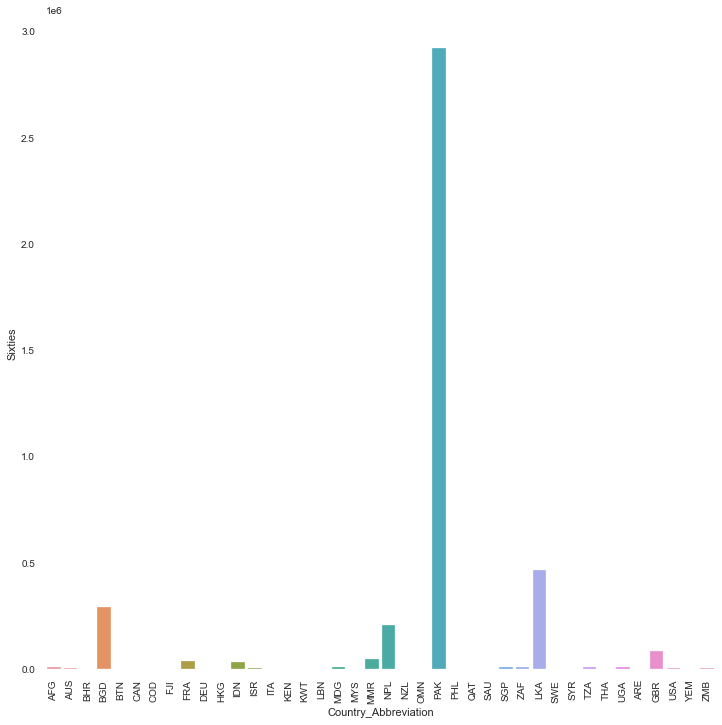

In [16]:
fig_dims = (12, 12)
fig, ax = plt.subplots(figsize=fig_dims)
six = sns.barplot(y=df_fem.Sixties,x=df_fem.Country_Abbreviation)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 40 Text major ticklabel objects>)

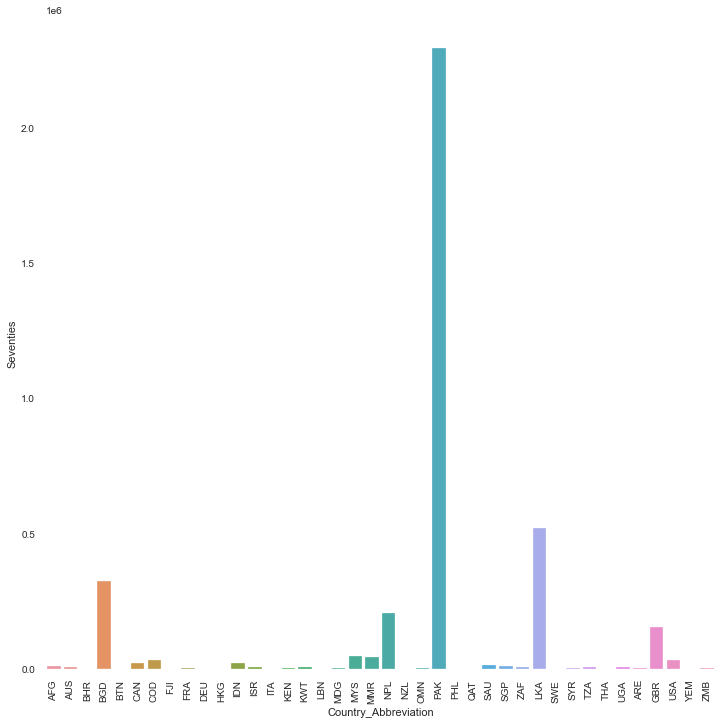

In [17]:
fig_dims = (12, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sev = sns.barplot(x=df_fem.Country_Abbreviation,y=df_fem.Seventies)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 40 Text major ticklabel objects>)

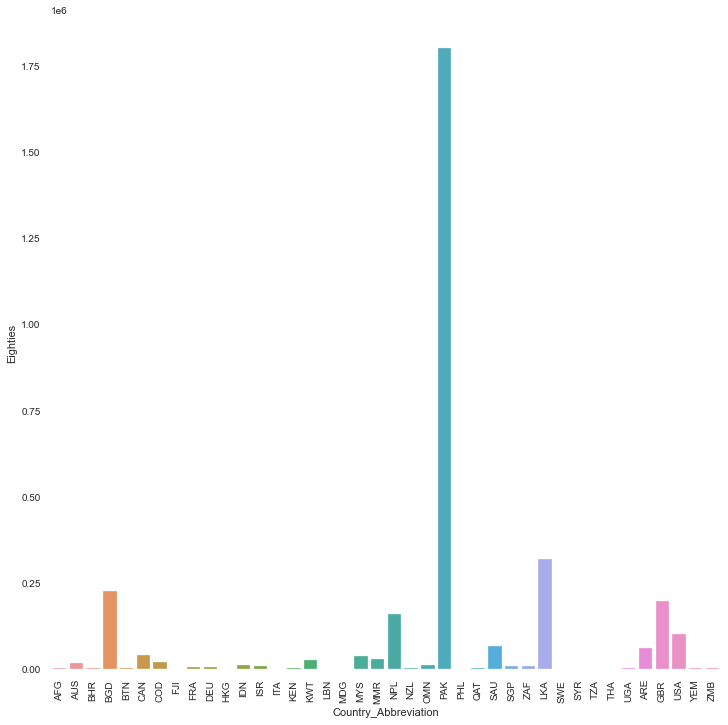

In [18]:
fig_dims = (12, 12)
fig, ax = plt.subplots(figsize=fig_dims)
eig = sns.barplot(x=df_fem.Country_Abbreviation,y=df_fem.Eighties)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 40 Text major ticklabel objects>)

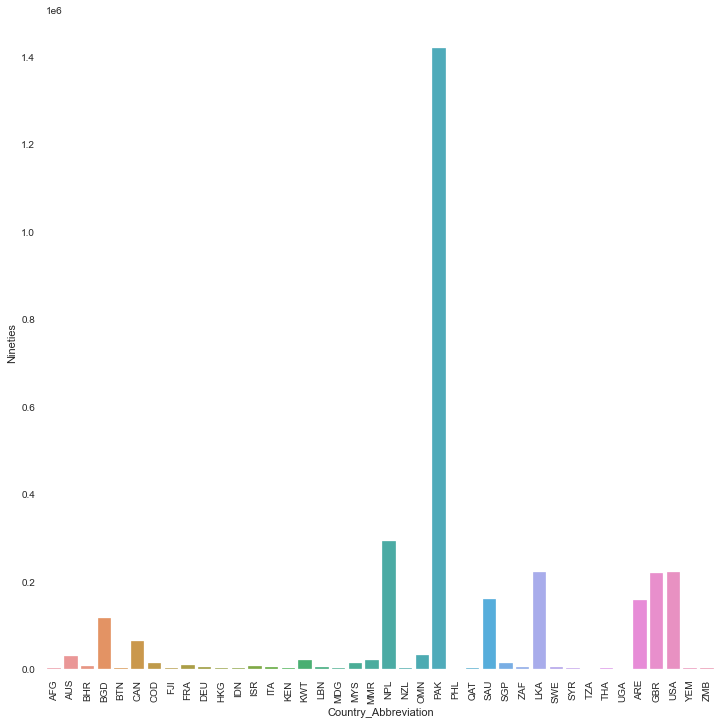

In [19]:
fig_dims = (12, 12)
fig, ax = plt.subplots(figsize=fig_dims)
nin = sns.barplot(x=df_fem.Country_Abbreviation,y=df_fem.Nineties)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 40 Text major ticklabel objects>)

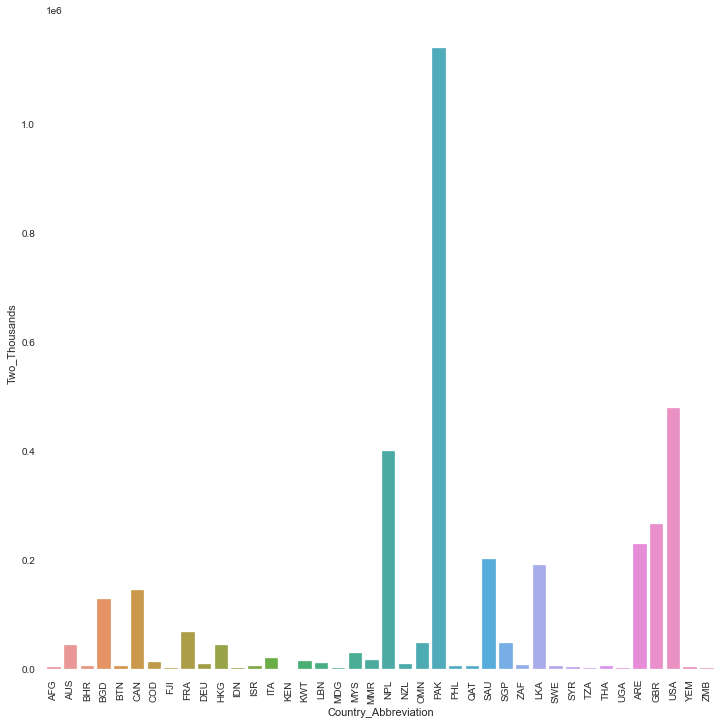

In [20]:
fig_dims = (12, 12)
fig, ax = plt.subplots(figsize=fig_dims)
two = sns.barplot(x=df_fem.Country_Abbreviation,y=df_fem.Two_Thousands)
plt.xticks(rotation=90)

# What does the data show

Essentially what is seen by the data above is that the migration out of India has skyrocketted in the recent years. It does follow trends as would be expected (see the modelling below). This can most likely be described as a greater access to money for the entirety of the society which results in a greater amount of mobility for immigration. This increase in movement is seen at the scale of 1e6 which is not a small population. Of course this may make more sense for many other things that are Indian (desire for Indian food, Yoga, etc etc.) Just a guess, but some modelling would be nice


# Creation of a Predictive Model
Models to be used: Linear Regression, Logistic Regression, RidgeCV, LassoCV, ElasticNet, DecisionTree

In [21]:
# Need to import the appropriate packages first
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [29]:
X = df_fem.copy()
y = X.pop('Country_Abbreviation')
y = y.reset_index()
y = y.drop(columns = 'Country_Abbreviation')

,index
0,0
1,11
2,15
3,16
4,23
5,34
6,44
7,66
8,68
9,74


In [30]:
Xs = scaler.fit(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

## Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline, make_pipeline

In [43]:
model_lr = LinearRegression()
model_ridge = RidgeCV()
model_elastic = ElasticNetCV()
model_lasso = LassoCV()

In [44]:
lr_pipe = Pipeline(steps=[('scaler', scaler),
                          ('model', model_lr)])
ridge_pipe = Pipeline(steps=[('scaler', scaler),
                          ('model', model_ridge)])
elastic_pipe = Pipeline(steps=[('scaler', scaler),
                          ('model', model_elastic)])
lasso_pipe = Pipeline(steps=[('scaler', scaler),
                          ('model', model_lasso)])


In [48]:
gs_lr_params = {'model__fit_intercept':[True], 'model__normalize':[False], 'model__copy_X':[True], 'model__n_jobs':[None]}
gs_ridge_params = {'model__alphas':[0.1, 1.0, 10.0]}
gs_elastic_params = {}
gs_lasso_params = {}

In [49]:
gs_lr = GridSearchCV(lr_pipe, gs_lr_params, cv=5, n_jobs=-1, verbose=1)
gs_ridge = GridSearchCV(model_ridge, gs_ridge_params, cv=5, n_jobs=-1, verbose=1)
gs_lasso = GridSearchCV(model_elastic, gs_elastic_params, cv=5, n_jobs=-1, verbose=1)
gs_elastic = GridSearchCV(model_lasso, gs_lasso_params, cv=5, n_jobs=-1, verbose=1)

In [52]:
model_lr.fit(X_train,y_train)
model_lr.score(X_train,y_train)

0.1744462703864672

In [53]:
model_ridge.fit(X_train,y_train)
model_ridge.score(X_train,y_train)

0.17444625262757718

In [54]:
model_elastic.fit(X_train,y_train)
model_elastic.score(X_train,y_train)

/Users/amitchandna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amitchandna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.954803116517724, tolerance: 10.879616
  tol, rng, random, positive)
/Users/amitchandna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.928241678193444, tolerance: 10.879616
  tol, rng, random, positive)
/Users/amitchandna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: 

0.1377667928147418

In [55]:
model_lasso.fit(X_train,y_train)
model_lasso.score(X_train,y_train)

/Users/amitchandna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amitchandna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.700875259542954, tolerance: 10.879616
  tol, rng, random, positive)
/Users/amitchandna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.7958782157948, tolerance: 10.879616
  tol, rng, random, positive)
/Users/amitchandna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: Co

0.13776716126901656